In [6]:
import pandas as pd

df = pd.read_pickle('../data/output/original.pkl')

df.head(10)

IDENTIFIER  SURVEY_YEAR  RACE  SAMPLE_ID  GENDER  \
Identifier Survey Year                                                     
1          1978                  1         1978     3        5.0       2   
           1979                  1         1979     3        5.0       2   
           1980                  1         1980     3        5.0       2   
           1981                  1         1981     3        5.0       2   
           1982                  1         1982     3        5.0       2   
           1983                  1         1983     3        5.0       2   
           1984                  1         1984     3        5.0       2   
           1985                  1         1985     3        5.0       2   
           1986                  1         1986     3        5.0       2   
           1987                  1         1987     3        5.0       2   

                        ASVAB_ARITHMETIC_REASONING  ASVAB_WORD_KNOWLEDGE  \
Identifier Survey Year                                                     
1          1978                                NaN                   NaN   
           1979                                NaN                   NaN   
           1980                                NaN                   NaN   
           1981                                NaN                   NaN   
           1982                                NaN                   NaN   
           1983                                NaN                   NaN   
           1984                                NaN                   NaN   
           1985                                NaN                   NaN   
           1986                                NaN                   NaN   
           1987                                NaN                   NaN   

                        ASVAB_PARAGRAPH_COMPREHENSION  \
Identifier Survey Year                                  
1          1978                                   NaN   
           1979                                   NaN   
           1980                                   NaN   
           1981                                   NaN   
           1982                                   NaN   
           1983                                   NaN   
           1984                                   NaN   
           1985                                   NaN   
           1986                                   NaN   
           1987                                   NaN   

                        ASVAB_NUMERICAL_OPERATIONS  ASVAB_ALTERED_TESTING  \
Identifier Survey Year                                                      
1          1978                                NaN                    NaN   
           1979                                NaN                    NaN   
           1980                                NaN                    NaN   
           1981                                NaN                    NaN   
           1982                                NaN                    NaN   
           1983                                NaN                    NaN   
           1984                                NaN                    NaN   
           1985                                NaN                    NaN   
           1986                                NaN                    NaN   
           1987                                NaN                    NaN   

                             ...        ENROLLED_SCHOOL_OCTOBER  \
Identifier Survey Year       ...                                  
1          1978              ...                            NaN   
           1979              ...                            NaN   
           1980              ...                            NaN   
           1981              ...                            NaN   
           1982              ...                            NaN   
           1983              ...                            NaN   
           1984              ...                    

We want a graph with the sample size over time.

In [30]:
num_obs = []
for year in df['SURVEY_YEAR'].unique():
    cond = df['IS_INTERVIEWED'].loc[:, year] == True
    num_obs += [df['IDENTIFIER'].loc[:, year][cond].count()]

print(num_obs)


[12686, 12686, 12141, 12195, 12123, 12221, 12069, 10894, 10655, 10485, 10465, 10605, 10436, 9018, 9016, 9011, 8891, 12686, 8636, 12686, 8399, 12686, 8032, 12686, 7724, 12686, 7661, 12686, 7654, 12686, 7757, 12686, 7565, 12686, 7301]


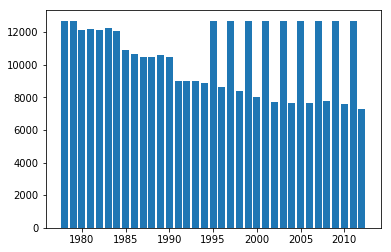

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.bar(df['SURVEY_YEAR'].unique(), num_obs)
plt.show()